In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [63]:
df=sns.load_dataset("titanic")

In [64]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [65]:
df2=df[['survived','pclass','age','parch']] 

In [66]:
df3=df2.fillna(df2.mean())

In [67]:
df3

,survived,pclass,age,parch
0,0,3,22.000000,0
1,1,1,38.000000,0
2,1,3,26.000000,0
3,1,1,35.000000,0
4,0,3,35.000000,0
...,...,...,...,...
886,0,2,27.000000,0
887,1,1,19.000000,0
888,0,3,29.699118,2
889,1,1,26.000000,0


In [68]:
X=df3.drop(columns='survived', axis=1)
y=df3["survived"]
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.2, random_state=51)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 3)
(712,)
(179, 3)
(179,)


In [100]:
sc=StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [71]:
sc.mean_

array([ 2.30617978, 29.55409121,  0.39185393])

In [72]:
sc.scale_

array([ 0.84405789, 12.99162985,  0.79647463])

In [74]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

X_train.columns

Index(['pclass', 'age', 'parch'], dtype='object')

In [75]:
X_train_sc=pd.DataFrame(X_train_sc, columns=['pclass', 'age', 'parch'])
X_test_sc=pd.DataFrame(X_test_sc, columns=['pclass', 'age', 'parch'])


In [79]:
X_train_sc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.55,-2.24,-0.49
25%,-0.66,-0.58,-0.49
50%,0.82,0.01,-0.49
75%,0.82,0.42,-0.49
max,0.82,3.19,5.79


In [80]:
# For min max scaller

In [99]:
mmc=MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [101]:
X_train_mmc=mmc.transform(X_train)
X_test_mmc=mmc.transform(X_test)

In [102]:
X_train_mmc=pd.DataFrame(X_train_mmc, columns=['pclass', 'age', 'parch'])
X_test_mmc=pd.DataFrame(X_test_mmc, columns=['pclass', 'age', 'parch'])


In [107]:
X_train_mmc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.65,0.41,0.08
std,0.42,0.18,0.16
min,0.00,0.00,0.00
25%,0.38,0.31,0.00
50%,1.00,0.41,0.00
75%,1.00,0.49,0.00
max,1.00,1.00,1.00


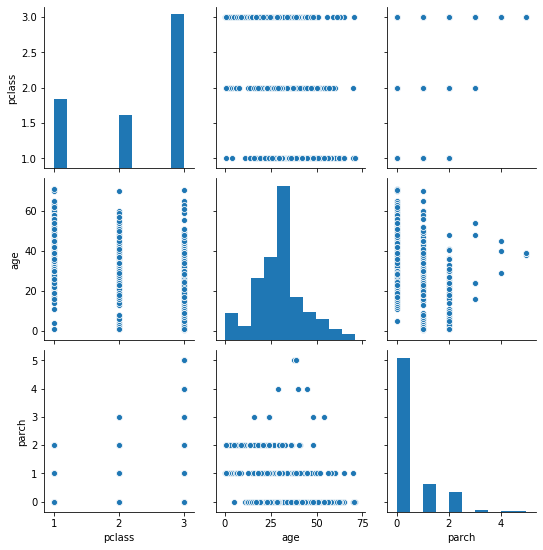

In [117]:
sns.pairplot(X_train)


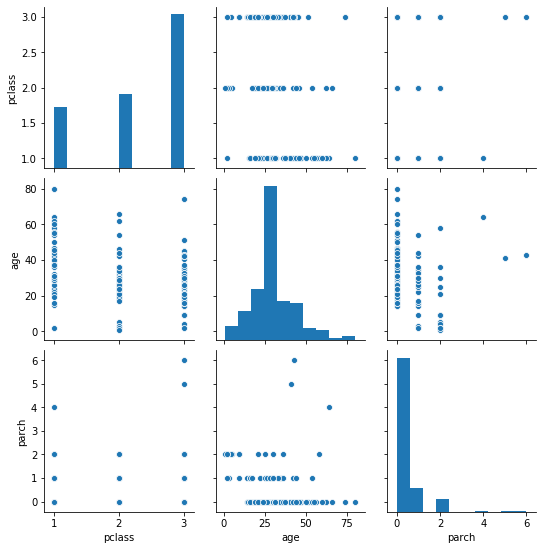

In [118]:
sns.pairplot(X_test)